<a href="https://colab.research.google.com/github/yasithebreather/NeuroAI/blob/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial2.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 2: Generalization in Neuroscience

**Week 1, Day 1: Generalization**

**By Neuromatch Academy**

__Content creators:__ Samuele Bolotta, Patrick Mineault and Shreya Saxena

__Content reviewers:__ Samuele Bolotta, Lily Chamakura, RyeongKyung Yoon, Yizhou Chen, Ruiyi Zhang, Aakash Agrawal, Alish Dipani, Hossein Rezaei, Yousef Ghanbari, Mostafa Abdollahi, Hlib Solodzhuk, Alex Murphy

__Production editors:__ Konstantine Tsafatinos, Ella Batty, Spiros Chavlis, Samuele Bolotta, Hlib Solodzhuk, Alex Murphy



___


# Tutorial Objectives

*Estimated timing of tutorial: 75 minutes*

This tutorial will introduce you to generalization in neuroscience. We'll look at a classic neuroscience paper, [Sussillo et al. (2015)](https://www.nature.com/articles/nn.4042), that compares how artificial and biological neural networks solve different motor tasks. This paper looks at how linear arm movements are generated in motor cortex; later extensions of these ideas (e.g. [Codol et al. 2024](https://elifesciences.org/reviewed-preprints/88591v2); [Almani et al. 2024](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=x-YACVoAAAAJ&sortby=pubdate&citation_for_view=x-YACVoAAAAJ:1yQoGdGgb4wC)) address how more complex skilled movements, including handwriting, can be generated, continuing our theme for today's tutorials. We'll look at a popular AI-derived framework for understanding how the brain solves tasks: task-driven neural networks.

Our learning goals for this tutorial are as follows:

1. Understand core goals in neuroscience. Examine the fundamental questions that drive neuroscience research, such as the 'What', 'How', and 'Why' behind neurological functions and behaviors.

2. Conceptualize what **generalization** means in the context of neuroscience, understanding how principles of neural generalization can inform and be informed by artificial intelligence.

3. Evaluate the impact of architectural choices. Discuss how different architectural decisions and the selection of priors in model design can introduce inductive biases, affecting the generalization capabilities of both neural and artificial systems.

4. Illustrate robustness in noisy environments. Identify and describe real-world instances where the pursuit of robustness against noise has led to converging strategies in both neuroscience and artificial intelligence.

In [ ]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

from IPython.display import IFrame
from ipywidgets import widgets
out = widgets.Output()

link_id = "79523"

with out:
    print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
    display(IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=730, height=410))
display(out)

---
# Setup

In [1]:
# @title Install and import feedback gadget

!pip install numpy scipy matplotlib torch tqdm vibecheck --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch_neuroai",
            "user_key": "wb2cxze8",
        },
    ).render()


feedback_prefix = "W1D1_T2"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00


In [2]:
# @title Import dependencies

# Standard Libraries for file and operating system operations, security, and web requests
import os
import hashlib
import requests
import random
import gc

# Core Python data science and visualization libraries
import numpy as np
import scipy
from matplotlib import pyplot as plt
import logging
from IPython.display import IFrame, display, Image

# Deep Learning libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torch.cuda.amp import autocast, GradScaler
from torch.autograd import profiler

# Additional utilities
from tqdm.autonotebook import tqdm

/tmp/ipython-input-2-3612161156.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perform high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [4]:
# @title Plotting functions

xlim = (-1.8, .7)

def plot_inputs_over_time(timesteps, avg_inputs, title='Inputs over Time'):
    """
    Plot the inputs over time.

    Inputs:
    - timesteps (list or array-like): A sequence of time steps at which the inputs were recorded.
      This acts as the x-axis in the plot, representing the progression of time.
    - avg_inputs (list or array-like): The average values of inputs corresponding to each time step.
      These values are plotted on the y-axis, showing the magnitude of inputs over time.
    - title (string): The title of the plot

    Returns:
    This function generates and displays a plot using Matplotlib.
    """

    with plt.xkcd():
        plt.figure(figsize=(8, 3))
        num_features = avg_inputs.shape[1] if hasattr(avg_inputs, 'shape') else len(avg_inputs[0])

        for feature_idx in range(num_features):
            current_feature_values = avg_inputs[:, feature_idx] if hasattr(avg_inputs, 'shape') else [row[feature_idx] for row in avg_inputs]
            label = f'Feature {feature_idx + 1}' if feature_idx < num_features - 1 else 'Go Cue'
            plt.plot(timesteps, current_feature_values, label=label)

        plt.title(title)
        plt.xlabel('Time (s)')
        plt.ylabel('Value (A.U.)')
        plt.subplots_adjust(right=0.7)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
        plt.tight_layout()
        plt.xlim(min(timesteps), max(timesteps))
        plt.show()

def plot_muscles_over_time(timesteps, avg_output, title='Muscles over Time'):
    """
    Plot the average outputs over time for two muscles to visualize changes in output values.
    The avg_output is expected to be a 250x2 array where each column corresponds to a different muscle.

    Inputs:
    - timesteps (list or array-like): A sequence of time steps at which the outputs were recorded.
      This acts as the x-axis in the plot, representing the progression of time.
    - avg_output (array-like, shape [250, 2]): The average values of outputs, with each column
      representing the output over time for each muscle.
    - title (string): The title of the plot

    Returns:
    This function generates and displays a plot using Matplotlib.
    """

    with plt.xkcd():

        plt.figure(figsize=(8, 3))  # Set the figure size
        plt.plot(timesteps, avg_output[:, 0], label='Muscle 1')  # Plot for muscle 1
        plt.plot(timesteps, avg_output[:, 1], label='Muscle 2')  # Plot for muscle 2
        plt.title(title)
        plt.xlabel('Time (s)')
        plt.ylabel('Value (A.U.)')

        # Adjust plot margins to provide space for the legend outside the plot
        plt.subplots_adjust(right=0.7)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)  # Placing legend outside

        plt.tight_layout()
        plt.xlim(min(timesteps), max(timesteps))  # Ensuring x-axis covers the range of timesteps
        plt.show()

def plot_training_validation_losses(epoch_losses, val_losses, actual_num_epochs, title):

    """
    This function plots the training and validation losses over epochs.

    Inputs:
    - epoch_losses (list of float): List containing the training loss for each epoch. Each element is a float
      representing the loss calculated after each epoch of training.
    - val_losses (list of float): List containing the validation loss for each epoch. Similar to `epoch_losses`, but
      for the validation set, allowing for the comparison between training and validation performance.
    - actual_num_epochs (int): The actual number of epochs the training went through. This could be different from
      the initially set number of epochs if early stopping was employed. It determines the range of the x-axis
      in the plot.
    - title (str): A string that sets the title of the plot. This allows for customization of the plot for better
      readability and interpretation.

    Outputs:
    This function generates and displays a plot using matplotlib.
    """

    with plt.xkcd():

        plt.figure(figsize=(8, 4))
        plt.plot(range(1, actual_num_epochs + 1), epoch_losses, label='Training Loss')
        plt.plot(range(1, actual_num_epochs + 1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(title)
        plt.legend()
        plt.xlim(xlim)
        plt.show()

# Plot hidden units in UnregularizedRNN
def plot_hidden_unit_activations(hidden_states, times, neurons_to_plot=5, title='PSTHs of Hidden Units'):
    """
    This function plots the average activation of a specified number of neurons from the hidden layers
    of a neural network over a certain number of timesteps.

    Inputs:
        hidden_states (tensor): A 2D tensor containing the hidden states of a network. The dimensions
                                should be (time, features), where 'time' represents the sequence of
                                timesteps, 'batch' represents different data samples, and 'features' represents
                                the neuron activations or features at each timestep.
        times (tensor): The time range that we focus on.
        neurons_to_plot (int, optional): The number of neuron activations to plot, starting from the first neuron.
                                         Defaults to 5.
        title (str, optional): The title of the plot, allowing customization for specific analyses or presentations.
                               Defaults to 'PSTHs of Hidden Units'.

    This function generates and displays a plot of the average activation of specified
    neurons over the selected timesteps, providing a visual analysis of neuron behavior within the network.
    """
    # Apply the nonlinearity to each hidden state before averaging
    rectified_tanh = lambda x: np.where(x > 0, np.tanh(x), 0)
    hidden_states_rectified = rectified_tanh(np.array(hidden_states))

    # Plotting

    with plt.xkcd():
        plt.figure(figsize=(8, 4))
        for i in range(min(neurons_to_plot, hidden_states_rectified.shape[1])):
            plt.plot(times, hidden_states_rectified[:, i], label=f'Neuron {i+1}')

        plt.xlabel('Time Steps')
        plt.ylabel('Activation')
        plt.title(title)

        # Adjust plot margins to provide space for the legend outside the plot
        plt.subplots_adjust(right=0.8)  # Adjust this value to create more or less space on the right
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  # Placing legend outside

        plt.xlim(times[0], times[-1])  # Setting x-axis limits based on the provided time tensor
        plt.show()

def plot_psth(data, condition=0, neurons_to_plot=5, title='PSTHs of real data'):
    """
    This function plots PSTHs from real neural data

    Args:
        data (dict): The data from the mat file from Sussillo et al. (2015)
        condition (int, optional): The condition (from 0 to 26). Defaults to 0.
        neurons_to_plot (int, optional): The number of neuron activations to plot, starting from the first neuron.
                                         Defaults to 5.
        title (str, optional): The title for the PSTH plot. This allows users to specify the context or the
                     experiment from which the data is derived.

    Outputs:
    This function directly generates and displays a plot using matplotlib
    to visually represent the neural activity across time bins.
    """
    # Plot
    with plt.xkcd():

        plt.figure(figsize=(8, 4))
        for neuron_idx in range(neurons_to_plot):  # Iterate over each feature/channel
            times_real = data['comboNjs'][0, neuron_idx]['interpTimes'][0]['times'][0].squeeze().astype(float)
            t0 = float(data['comboNjs'][0, neuron_idx]['interpTimes'][0]['moveStarts'][0].item())
            times_real = (times_real - t0) / 1000.0

            spikes_real = data['comboNjs'][0, neuron_idx]['cond'][0]['interpPSTH'][0].squeeze()
            plt.plot(times_real, spikes_real, label=f'Neuron {neuron_idx+1}')

        plt.xlabel('Time (s)')
        plt.ylabel('Average Activity (Hz)')
        plt.title(title)

        # Adjust plot margins and place legend outside the plot
        plt.subplots_adjust(right=0.8)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

        plt.xlim(times_real[0], times_real[-1])  # Assume times_real is defined
        plt.show()


def plot_perturbation_results(perturbation_strengths, results_regularized, results_unregularized, title):
    """
    This function plots the normalized error percentages of two models (regularized and unregularized) under various
    perturbation strengths.

    Inputs:
        perturbation_strengths (list of float): A list of perturbation strengths tested, representing the
                                                 magnitude of perturbations applied to the model input or parameters.
        results_regularized (list of tuples): Each tuple contains (mean error, standard deviation) for the regularized model
                                         at each perturbation strength.
        results_unregularized (list of tuples): Each tuple contains (mean error, standard deviation) for the unregularized model
                                          at each perturbation strength.
        title (str): The title of the plot, allowing for customization to reflect the analysis context.

    The function generates and displays a bar plot comparing the normalized error
    rates of regularized and unregularized models under different perturbation strengths, with error bars representing the
    standard deviation of errors, normalized to percentage scale.
    """
    mean_errors_regularized, std_errors_regularized = zip(*results_regularized)
    mean_errors_unregularized, std_errors_unregularized = zip(*results_unregularized)

    print("mean_errors_regularized", mean_errors_regularized)
    print("mean_errors_unregularized", mean_errors_unregularized)

    # Plotting

    with plt.xkcd():
        plt.figure(figsize=(8, 6))
        bar_width = 0.35
        bar_positions = np.arange(len(perturbation_strengths))

        plt.bar(bar_positions - bar_width/2, mean_errors_regularized, width=bar_width, color='blue', yerr=std_errors_regularized, capsize=5, label='Regularized Model')
        plt.bar(bar_positions + bar_width/2, mean_errors_unregularized, width=bar_width, color='red', yerr=std_errors_unregularized, capsize=5, label='Unregularized Model')

        plt.xlabel('Perturbation Magnitude')
        plt.ylabel('Normalized Error (%)')
        plt.title(title)
        plt.xticks(bar_positions, [f"{x:.5f}" if x < 0.1 else f"{x}" for x in perturbation_strengths])
        plt.legend()
        plt.ylim(0, 100)
        plt.show()

In [5]:
# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.
# @markdown

# inform the user if the notebook uses GPU or CPU.

def set_device():
    """
    Determines and sets the computational device for PyTorch operations based on the availability of a CUDA-capable GPU.

    Outputs:
    - device (str): The device that PyTorch will use for computations ('cuda' or 'cpu'). This string can be directly used
    in PyTorch operations to specify the device.
    """

    device = "cuda" if torch.cuda.is_available() else "cpu"
    if device != "cuda":
        print("GPU is not enabled in this notebook. \n"
              "If you want to enable it, in the menu under `Runtime` -> \n"
              "`Hardware accelerator.` and select `GPU` from the dropdown menu")
    else:
        print("GPU is enabled in this notebook. \n"
              "If you want to disable it, in the menu under `Runtime` -> \n"
              "`Hardware accelerator.` and select `None` from the dropdown menu")

    return device

device = set_device()

GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


In [6]:
# @title Set random seed, when using `pytorch`

# @markdown Executing `set_seed(seed=seed)` will specify the exact random seed to use

# Call `set_seed` function in the exercises to ensure reproducibility.

def set_seed(seed=None, seed_torch=True):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

# In case that `DataLoader` is used
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [7]:
# @title Data retrieval

import os
import requests
import hashlib

def retrieve_file(fname, url, expected_md5):
    # Check if the file already exists
    if not os.path.isfile(fname):
        try:
            # Attempt to download the file
            response = requests.get(url)
        except requests.ConnectionError:
            # Handle connection errors during the download
            print("!!! Failed to download data !!!")
        else:
            # No connection errors, proceed to check the response
            if response.status_code != requests.codes.ok:
                # Check if the HTTP response status code indicates a successful download
                print("!!! Failed to download data !!!")
            elif hashlib.md5(response.content).hexdigest() != expected_md5:
                # Verify the integrity of the downloaded file using MD5 checksum
                print("!!! Data download appears corrupted !!!")
            else:
                # If download is successful and data is not corrupted, save the file
                with open(fname, "wb") as fid:
                    fid.write(response.content) # Write the downloaded content to a file

# List of files to be downloaded with their respective URLs and expected MD5 hashes
files = [
    ("regularized_model_final.pth", "https://osf.io/kc7sb/download", "9435a9c2ea75766144bf840b25bfb97e"),
    ("unregularized_model_final.pth", "https://osf.io/9vsy5/download", "2e3dc9551b677206e2315788df354a91"),
    ("condsForSimJ2moMuscles.mat", "https://osf.io/wak7e/download", "257d16c4d92759d615bf5cac75dd9a1f"),
    ("m1_reaching_data.mat", "https://osf.io/p2x4n/download", "6fc65443b9632db47772dd2efaadeee0")
]

for fname, url, expected_md5 in files:
    retrieve_file(fname, url, expected_md5)

In [8]:
# @title Helper functions

# Define a custom Rectified Tanh activation function
def rectified_tanh(x):
    return torch.where(x > 0, torch.tanh(x), 0)

def grad_rectified_tanh(x):
    return torch.where(x > 0, 1 - torch.tanh(x)**2, 0)

def grad_tanh(x):
    return 1 - torch.tanh(x)**2

def compute_l2_regularization(parameters, alpha):
    l2_reg = sum(p.pow(2.0).sum() for p in parameters)
    return alpha * l2_reg

def prepare_dataset(file_path, feature_idx=7, muscle_idx=1):
    """
    Load and preprocess data from a .mat file for RNN training.

    Args:
    - file_path: str, path to the .mat file containing the dataset.
    - feature_idx: int, index for individual features for plotting. Max 14.
    - muscle_idx: int, index for muscles for plotting. Max 1.

    Returns:
    - normalised_inputs: Tensor, normalized and concatenated Plan and Go Envelope tensors.
    - avg_output: Tensor, average muscle activity across conditions and delays.
    - timesteps: np.ndarray, array of time steps for plotting.
    """
    # Load the .mat file
    data = scipy.io.loadmat(file_path)

    # Extract condsForSim struct
    conds_for_sim = data['condsForSim']

    # Initialize lists to store data for all conditions
    go_envelope_all, plan_all, muscle_all = [], [], []

    # Get the number of conditions (rows) and delay durations (columns)
    num_conditions, num_delays = conds_for_sim.shape

    times = conds_for_sim['timesREmove'][0][0] / 1000.0

    # Select the same time period as the PSTHs
    rg = slice(46, 296)

    for i in range(num_conditions):  # Loop through each condition
        go_envelope_condition, plan_condition, muscle_condition = [], [], []

        for j in range(num_delays):  # Loop through each delay duration
            condition = conds_for_sim[i, j]
            go_envelope, plan, muscle = condition['goEnvelope'], condition['plan'], condition['muscle']
            selected_muscle_data = muscle[:, [3, 4]]  # Select only specific muscles
            go_envelope_condition.append(go_envelope[rg, :])
            plan_condition.append(plan[rg, :])
            muscle_condition.append(selected_muscle_data[rg, :])

        # Convert lists of arrays to tensors and append to all conditions
        go_envelope_all.append(torch.tensor(np.array(go_envelope_condition), dtype=torch.float32))
        plan_all.append(torch.tensor(np.array(plan_condition), dtype=torch.float32))
        muscle_all.append(torch.tensor(np.array(muscle_condition), dtype=torch.float32))

    times = times[rg]

    # Stack tensors for all conditions
    go_envelope_tensor, plan_tensor, output = torch.stack(go_envelope_all), torch.stack(plan_all), torch.stack(muscle_all)

    # Cleanup to free memory
    del data, conds_for_sim, go_envelope_all, plan_all, muscle_all
    gc.collect()

    # Normalize and Standardize Plan Tensor
    plan_tensor = normalize_and_standardize(plan_tensor)

    # Normalise and concatenate Plan and Go Envelope Tensors
    normalised_inputs = normalize_and_standardize(torch.cat([plan_tensor, go_envelope_tensor], dim=3))

    fixed_delay = 3
    inputs_no_delay = normalised_inputs[:, fixed_delay, ...]
    output_no_delay = output[:, fixed_delay, ...]
    return inputs_no_delay, normalised_inputs, output_no_delay, output, times

def normalize_and_standardize(tensor):
    """
    Normalize and standardize a given tensor.

    Args:
    - tensor: Tensor, the tensor to be normalized and standardized.

    Returns:
    - standardized_normalized_tensor: Tensor, the normalized and standardized tensor.
    """
    min_val, max_val = tensor.min(), tensor.max()
    tensor = (tensor - min_val) / (max_val - min_val)  # Normalize
    mean, std = tensor.mean(), tensor.std()
    return (tensor - mean) / std  # Standardize

def train_val_split():
    """Split the data into train and validation splits.
    """
    train_split, val_split = random_split(range(27), [20, 7])
    return sorted(list(train_split)), sorted(list(val_split))

In [ ]:
# @title Video 1: Overview

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'lW0U2vv5BmQ'), ('Bilibili', 'BV1g1421C7G4')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_overview_video")

# Definitions

* Peristimulus Time Histogram (PSTH) - A visualization tool to temporally display neuronal firing rates around an external stimulus event

---
# Section 1: Motivation: How the brain generates motor commands

Let's put ourselves in the mindset of a neuroscientist trying to understand how the brain generates motor sequences. A classic example of a complex motor sequence is handwriting, which we looked at in the last tutorial. This skill involves coordinated movement of the arm, wrist and fingers.

The mapping between the goal (e.g. moving the arm) and the sequence of motor commands that drive different muscles is highly nonlinear and recurrent. Furthermore, the brain must *generalize* beyond its training data; for instance, when the recurrent connections of the brain attempt to maintain stability in the face of noise in the environment (homeostasis effects), or when the arm is under different pressures. How does the brain do that?

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/setup.png?raw=true" width=600 />

*Image adapted from Rizzoglio et al. (2023). From monkeys to humans: observation-based EMG brain–computer interface decoders for humans with paralysis. Journal of Neural Engineering. 10.1088/1741-2552/ad038e. CC-BY 4.0.*

Our neuroscientist is trying to address a *how* question: how does the brain find solutions to complex control problems that generalize? Recurrent neural networks (RNNs) are a type of artificial neural network that have proven to be a very useful tool to address these *how* questions. They mimic the adaptability and plasticity observed in biological neural networks through interconnected artificial neurons, weights dictating connection strengths, and activation functions triggering neuron responses. **Task-driven neural networks** are trained *in silico* (using computers) to solve similar tasks to ones that the brain must solve. With the specification to prefer simple solutions over more complex solutions, model representations are often similar to the ones that the brain seems to find. The trained artificial neural networks can then be used to investigate, mechanistically, how a task is solved in the brain.

![Picture which shows an RNN.](https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/rnn.png?raw=true)

Let's illustrate these ideas with a classic paper in this field: [Sussillo et al. (2015)](https://www.nature.com/articles/nn.4042). They train an RNN to solve a motor task by learning to map movement direction commands to arm movements recorded via electromyography (EMG). Looking inside this RNN gives them the ability to ask questions about generalization. They then compare the model representations from the RNN to spike data from the motor cortex (M1) of a monkey performing a similar task. Do they perform similarly? Is the RNN performing the same kind of task as the brain, in a similar way?

In [ ]:
# @title Video 2: Setup

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'AEQJ6e32ZeQ'), ('Bilibili', 'BV1D6421f7vH')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_setup")

---
# Section 2: Training an unregularized task-driven neural network

In this activity, our goal is to train recurrent neural networks to mimic the muscle activity (EMG) of monkeys during arm movements. The challenge is to transform simple inputs (task features) into complex patterns of muscle activity over time and space.

In [9]:
# Define the path to the dataset file containing conditions for simulation of muscles
file_path = 'condsForSimJ2moMuscles.mat'

# Prepare the dataset by loading and processing it from the specified file path
normalised_inputs, normalised_inputs_with_delay, outputs, outputs_with_delay, times = prepare_dataset(file_path)

print("Shape of the inputs", normalised_inputs.shape)
print("Shape of the output", outputs.shape)

Shape of the inputs torch.Size([27, 250, 16])
Shape of the output torch.Size([27, 250, 2])


These dimensions correspond to the following:

* 27 conditions, one for each trial in the data
* 250 time steps (each trial was 2.5 seconds in length, measured at 100 Hz)
* The inputs are 16-dimensional, with 15 dimensions corresponding to the reach condition (explained below) and the 16th dimension corresponding to the Go Cue.
* The outputs are 2-dimensional, corresponding to the target electromyography (EMG) data for **2** muscles.

The inputs to the model are 16-dimensional vectors that specify which reach to perform. Each reach condition is represented by a unique 15-dimensional vector, which remains constant during the movement preparation period from -1s to 0s. The 16th dimension, a Go Cue, features a small bump at 0s, signaling the model to start generating the output.

To illustrate, consider a robot arm that needs to reach different objects positioned in various locations. The condition-specific inputs would guide the robot on which object to reach for (e.g., left, right, up, down). Prior to each reach, the robot's "brain" (neural activity) prepares in a particular manner, and this readiness is recorded. These readiness signals are then fed into the RNN, helping it understand and prepare for the specific reach.

Initially, the robot remains still (hold cue). Following a brief delay, it receives a signal to begin the reach. These delays and specific inputs train the robot to accurately perform the reach for each condition.

Take a look at the output shapes printed above and mentally visualize the structure of the array.
Let's look at the few of the inputs and outputs to get a better understanding of the data. Note that "Reach direction $N$" refers to one of the reach conditions (e.g. move down / up / left / right).

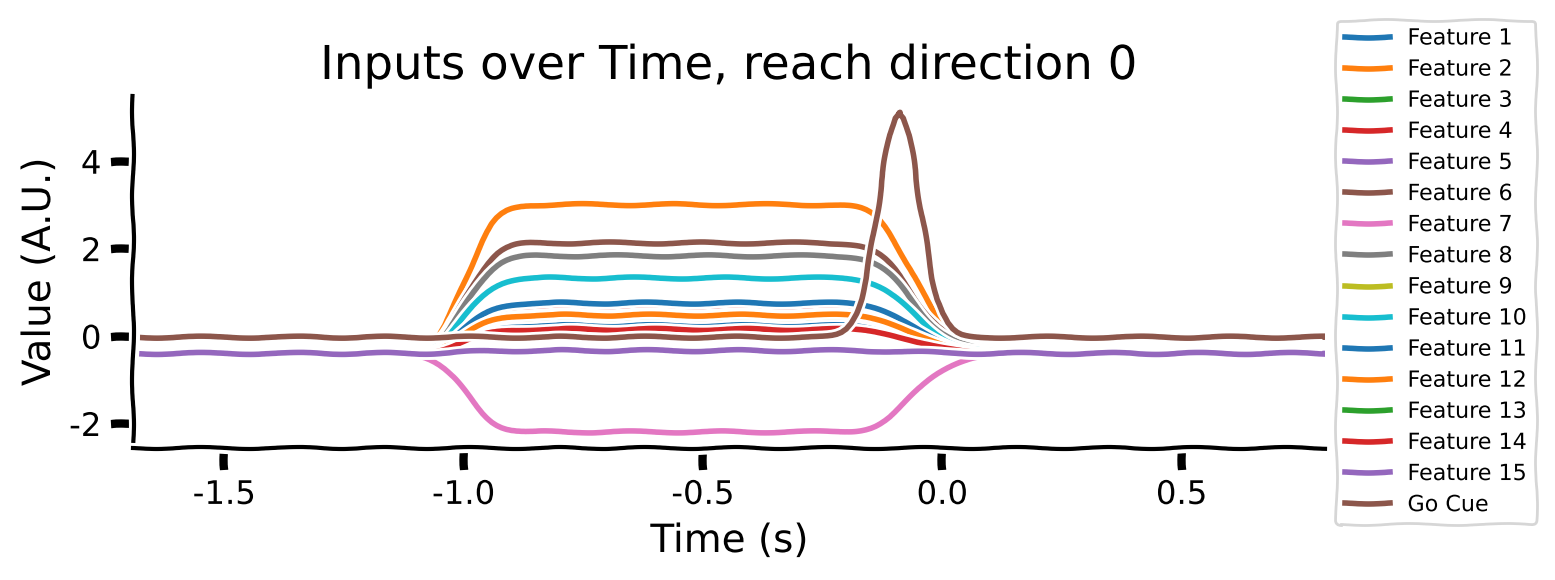

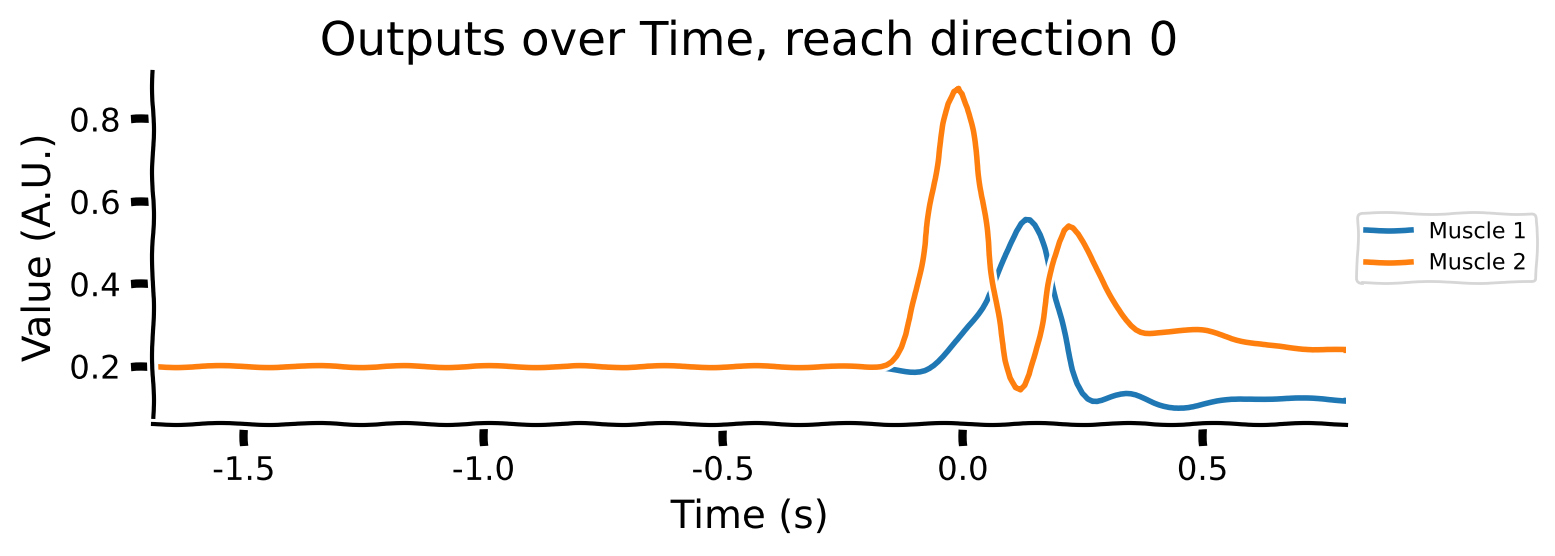

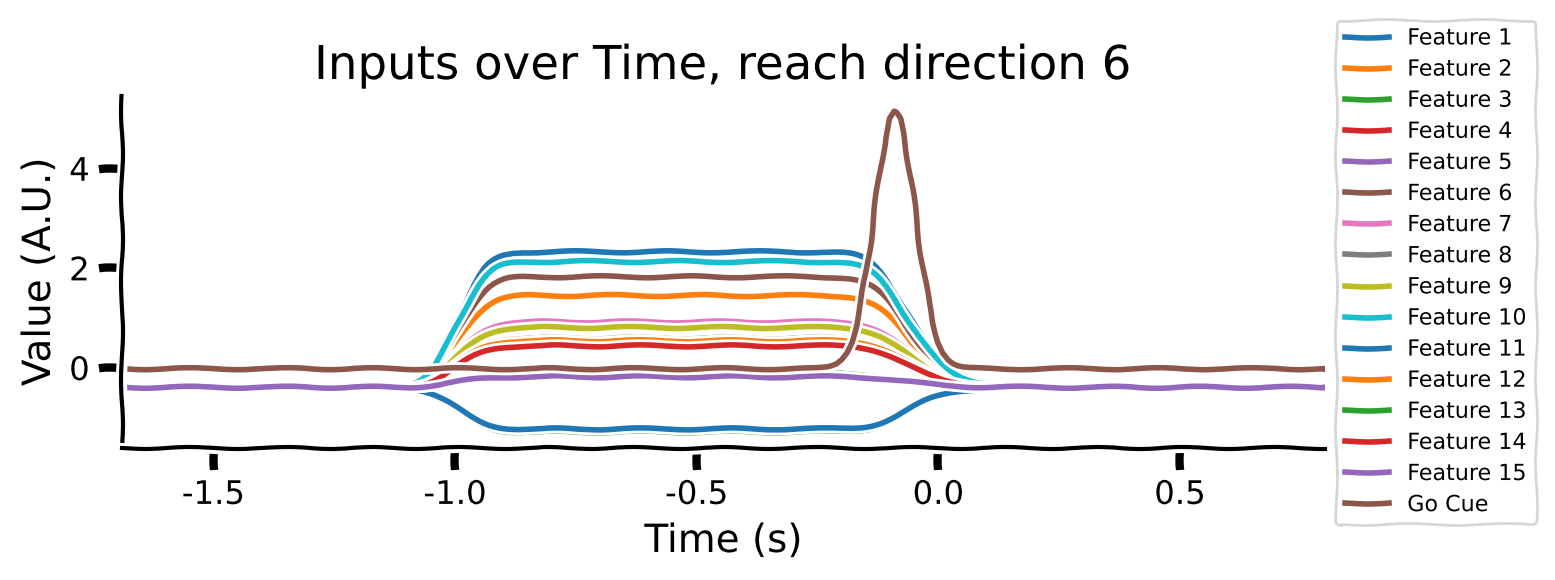

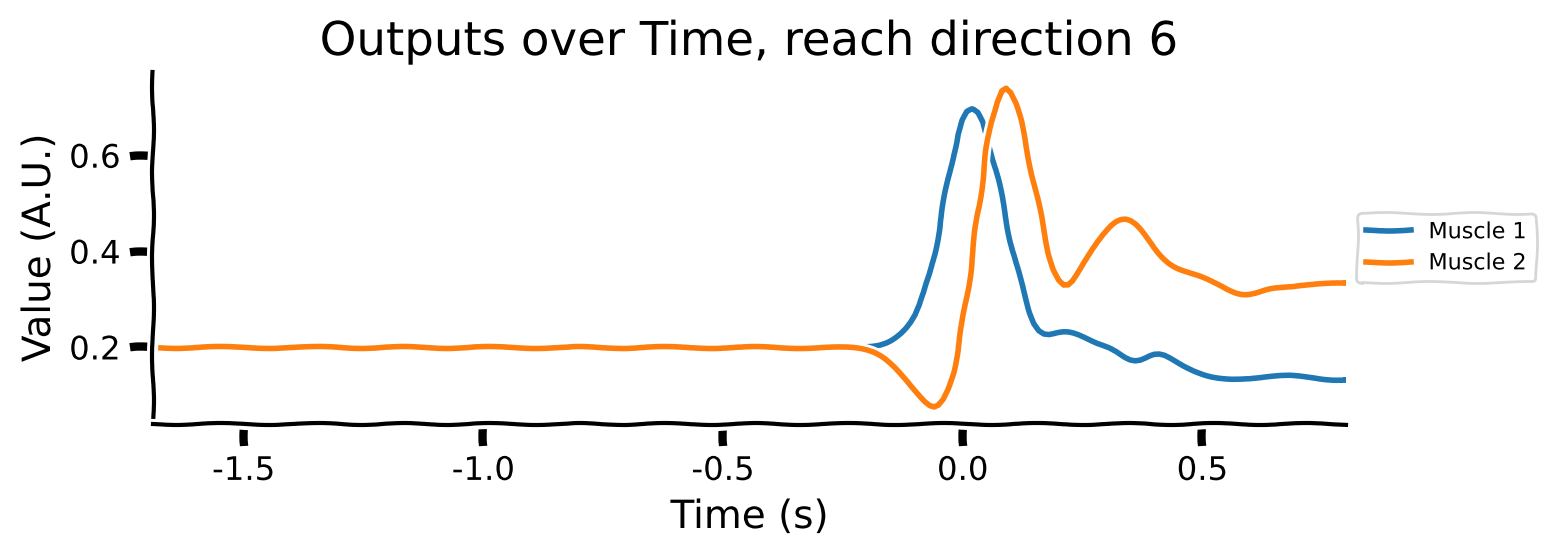

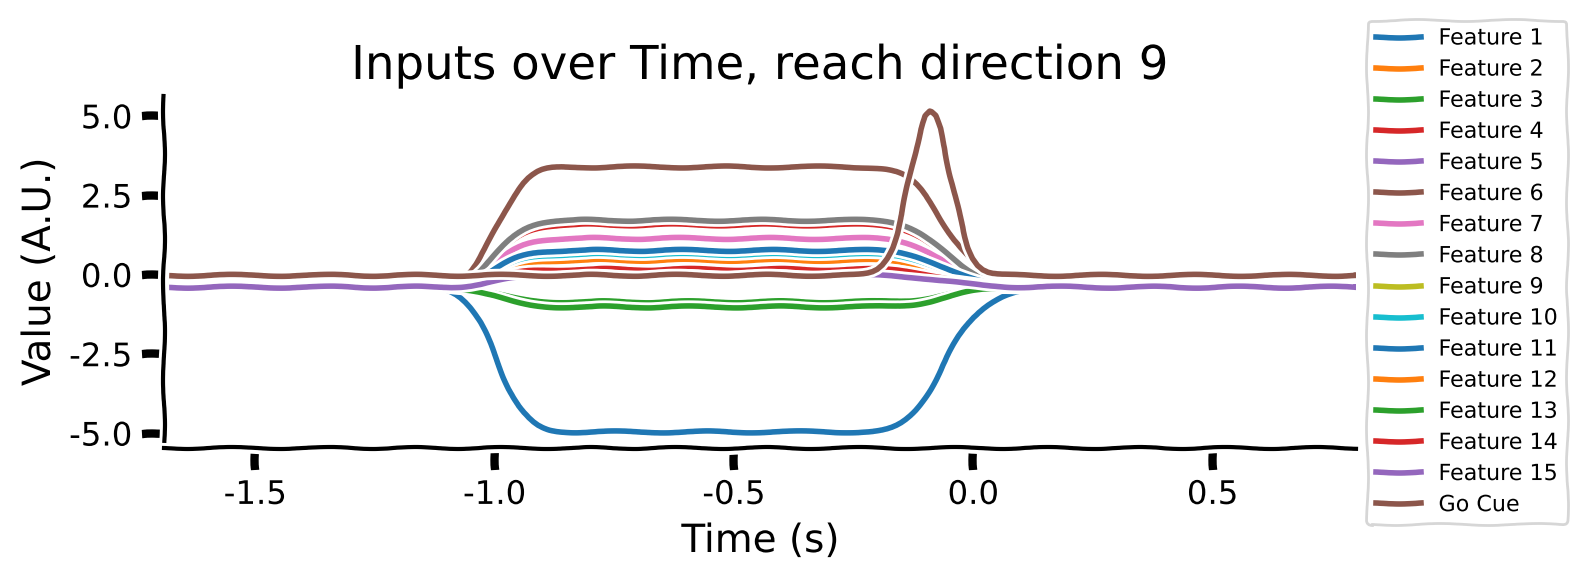

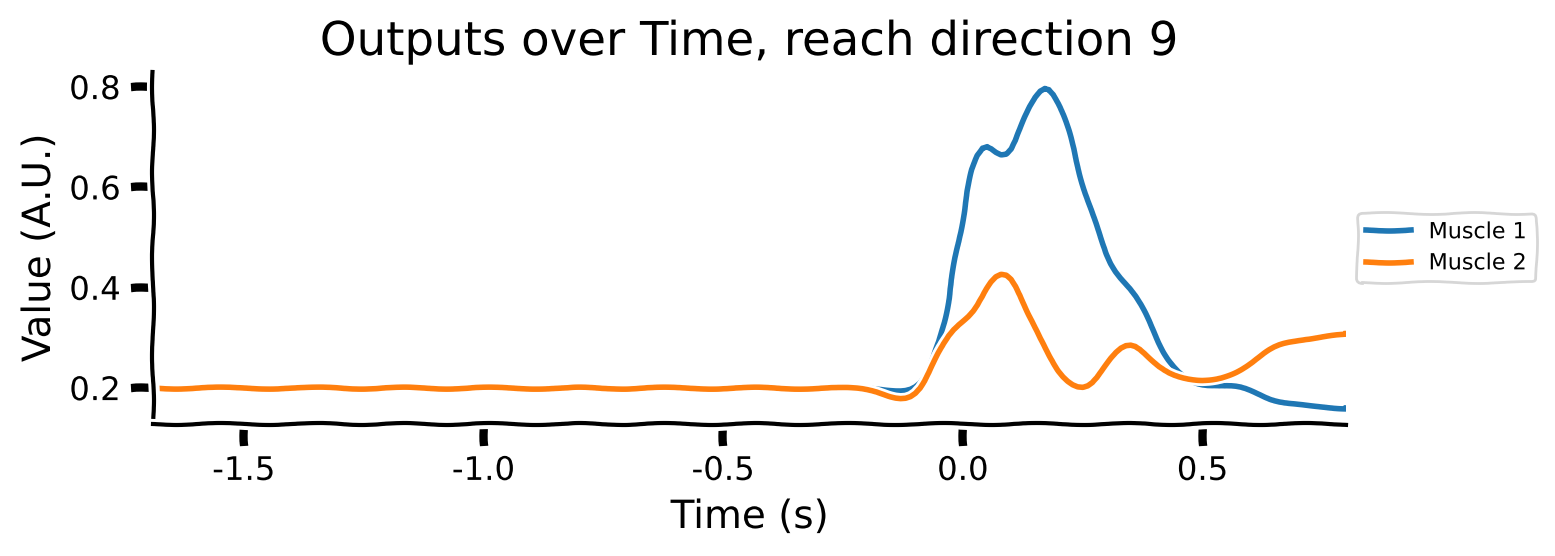

In [10]:
# Averaging across conditions and delays
reach_directions = [0, 6, 9]
for reach in reach_directions:
    # Plot inputs and outputs
    one_direction = normalised_inputs[reach, ...].clone()
    # Exaggerate the Go Cue for visualization purposes
    one_direction[:, -1] *= 5
    plot_inputs_over_time(times, one_direction, title=f'Inputs over Time, reach direction {reach}')
    plot_muscles_over_time(times, outputs[reach, ...], title=f'Outputs over Time, reach direction {reach}')

As you can see:

* the movement (reach condition) to be generated is encoded by a 16-dimensional signal during the hold period (from -1 to 0s).
* the 16-dimensional signal is unique for each reach direction
* The Go Cue (feature 16, timepoint 0) signals that it's time to start generating the movement
* The movements of the muscles are generated right after the GO Cue.

Let's create a PyTorch `Dataset` object to hold the data we just described.

In [ ]:
class TimeseriesDataset(Dataset):
    def __init__(self, inputs, targets):
        """
        inputs: Tensor of shape [num_examples, time, input_features]
        targets: Tensor of shape [num_examples, time, output_features]
        """
        self.inputs = inputs
        self.targets = targets
        self.num_conditions = inputs.shape[0]
        assert inputs.shape[0] == targets.shape[0]

    def __len__(self):
        return self.num_conditions

    def __getitem__(self, idx):
        input_seq = self.inputs[idx]
        target_seq = self.targets[idx]
        return input_seq, target_seq

# Create the dataset with the fixed delay
train_idx, val_idx = train_val_split()
train_dataset = TimeseriesDataset(normalised_inputs[train_idx], outputs[train_idx])
val_dataset = TimeseriesDataset(normalised_inputs[val_idx], outputs[val_idx])

# Create DataLoaders
batch_size = 20
unregularized_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
unregularized_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Setup")

## Coding exercise 2.1: Defining an unregularized RNN

Let's start by defining an unregularized RNN by inheriting from `nn.Module`. This RNN takes in the time-varying control inputs and outputs muscle outputs.

The model is a single-layer recurrent neural network defined in continuous time. The network takes in an input vector (all timepoints) and outputs muscle EMG (also for all timepoints). The hidden state of the network $\mathbf{x}$ evolves according to the equation:

$$\tau \frac{d\mathbf{x}}{dt} = -\mathbf{x} + \mathbf{B}\mathbf{u} + \mathbf{J}\mathbf{r} + \mathbf{b}$$

Here we have:

* $\mathbf{u}$ is the stimulus input at the current timestep
* $\mathbf{B}\mathbf{u}$ is the feedforward drive (activity) of the neural network, the inputs $\mathbf{u}$ are linearly projected through a set of weights $\mathbf{B}$
* $\mathbf{r} = |\tanh(\mathbf{x})|$ is the hidden activity passed through a rectifying, saturating non-linear activation function
* $\mathbf{J}\mathbf{r}$ is the recurrent drive (activity) of the neural network, the recurrent activity $\mathbf{r}$ is linearly projected through a set of weights $\mathbf{J}$
* $\mathbf{b}$ is a constant
* $\tau$ is a scalar corresponding to the time scale of the network, 50 ms

To transform this to a standard discrete-time neural network, we use Euler integration with a time step equal to the resolution of the simulation, 10ms. See the [Comp Neuro W2D2](https://compneuro.neuromatch.io/tutorials/W2D2_LinearSystems/student/W2D2_Tutorial1.html?highlight=euler+integration#coding-exercise-1-forward-euler-integration) to brush up on this idea if this idea is not clear.

Thus, the discretized update equation will be:

$$\mathbf{x_{t+1}} = \mathbf{x}_{t} + \Delta t\frac{d\mathbf{x_t}}{dt}$$

There are a few more parameters to consider:

* The scale of the parameters of the input mixing matrix $\mathbf{B}$ is determined by $h$ (not shown in equation)
* The scale of the parameters of the input mixing matrix $\mathbf{J}$ is determined by $g$ (not shown in equation).
* We initialize $g$ to a value larger than 1, so the neural network is in a so-called *chaotic regime*.
* The network is initialized with hidden state $\mathbf{x}=0$

Finally, the model's predicted EMG activity is given by a linear readout:

$$z = \mathbf{W}\mathbf{r} + c$$

In this notation, we can interpret $\mathbf{r}$ as the firing rates of the neurons. Take a look at the equation above: the hidden state, $\mathbf{x}$ (representation of stimuli in the brain), is evolving over time and is driven by current stimuli input $\mathbf{u}$ and firing rates of neurons in the previous time step, $\mathbf{r}$. EMG activity, $z$, is a direct linear projection from firing rates.

Let's code up this unregularized neural network.

In [ ]:
class UnregularizedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, g, h, tau_over_dt=5):
        super(UnregularizedRNN, self).__init__()
        self.hidden_size = hidden_size
        self.tau_over_dt = tau_over_dt
        self.output_linear = nn.Linear(hidden_size, output_size)

        # Weight initialization
        self.J = nn.Parameter(torch.randn(hidden_size, hidden_size) * (g / torch.sqrt(torch.tensor(hidden_size, dtype=torch.float))))
        self.B = nn.Parameter(torch.randn(hidden_size, input_size) * (h / torch.sqrt(torch.tensor(input_size, dtype=torch.float))))
        self.bx = nn.Parameter(torch.zeros(hidden_size))

        # Nonlinearity
        self.nonlinearity = rectified_tanh

    def forward(self, input, hidden):
        #################################################
        # TODO for students: fill in the missing variables
        # Fill out function and remove
        raise NotImplementedError("Student exercise: fill in the missing variables")
        #################################################

        # Calculate the visible firing rate from the hidden state.
        firing_rate_before = ...

        # Update hidden state
        recurrent_drive = torch.matmul(self.J, firing_rate_before.transpose(0, 1))
        input_drive = torch.matmul(self.B, input.transpose(0, 1))
        total_drive = recurrent_drive + input_drive + self.bx.unsqueeze(1)
        total_drive = total_drive.transpose(0, 1)

        # Euler integration for continuous-time update
        hidden = hidden + (1 / self.tau_over_dt) * (-hidden + total_drive)

        # Calculate the new firing rate given the update.
        firing_rate = ...

        # Project the firing rate linearly to form the output
        output = ...

        return output, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial2_Solution_98ebec10.py)



In [ ]:
input_size = 16
hidden_size = 10
output_size = 2
g = 4
h_val = 1.0

model = UnregularizedRNN(input_size, hidden_size, output_size, g, h_val)
model.to(device)

for inputs, targets in unregularized_train_loader:
    hidden = model.init_hidden(batch_size)
    output, hidden_after = model(inputs[:, 0, :].to(device), hidden.to(device))
    assert output.shape == targets[:, 0].shape
    assert hidden_after.shape == hidden.shape
    break

Great! Now we have the model ready to go.

Note: In further code below, we'll reference the `inputs` variable generated in the cell above (it will be from the last unpacking operation in `unregularized_train_loader`).

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_2.1")

## Coding exercise 2.2: Evaluate function

A **trajectory** in the current context means a complete temporal sequence over the duration of each trial. We'll need a function that can generate an entire trajectory based on a set of inputs. To do that, we'll first initialize the hidden state of the model, then recurrently feed the inputs and the hidden states back into the model. Fill in the missing lines to generate an entire trajectory.

In [ ]:
def generate_trajectory(model, inputs, device):
    #################################################
    # TODO for students: fill in the missing variables
    # Fill out function and remove
    raise NotImplementedError("Student exercise: fill in the missing variables")
    #################################################
    inputs = inputs.to(device)
    batch_size = inputs.size(0)
    h = ... #note that `UnregularizedRNN` has a specific method for that

    loss = 0
    outputs = []
    hidden_states = []
    with torch.no_grad():
        for t in range(inputs.shape[1]):
            # Forward the model's input and hidden state to obtain the model
            # output and hidden state *h*.
            # Note that you should index the input tensor by the time dimension
            # Capture any additional outputs in 'rest'
            output, h, *rest = ...
            outputs.append(output)
            hidden_states.append(h.detach().clone())

    return torch.stack(outputs, axis=1).to(device), torch.stack(hidden_states, axis=1).to(device)

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial2_Solution_c14a4735.py)



In [ ]:
trajectory, hidden_states = generate_trajectory(model,
                                             inputs[0].unsqueeze(0),
                                             device)

with plt.xkcd():

  # Remove unitary dimension, detach from PyTorch computational
  # graph, move to the CPU and convert to a numpy array
  hidden_states = hidden_states.squeeze().detach().cpu().numpy()
  trajectory = trajectory.squeeze().detach().cpu().numpy()

  plot_hidden_unit_activations(hidden_states=hidden_states,
                               times=times,
                               neurons_to_plot=7,
                               title='Hidden units')
  plot_muscles_over_time(times, trajectory, 'Generated muscle activity')

Remember, our model is untrained. It's not supposed to give great results yet. However, it's very good practice to see the outputs of an untrained network to get a sense of the starting position the model is at before any training has occurred. In some NeuroAI applications, untrained models can generate activity that is surprisingly similar to some brain activity in some scenarios, so it pays to know what your model *looks like* not only after training, but also before.

This untrained model generates funky oscillatory activity, but we'll fix that during training!

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_2.2")

## Activity 2.1: Evaluating the model

We're now ready to train our model. This involves:

* Loading the data
* Instantiating the model
* Building a training loop
* Using stochastic gradient descent (SGD) to train the model

To save you time, however, we've trained the model in advance. You'll load a trained checkpoint. This trained model can generate the right muscle outputs in response to the right inputs. Let's do a quick check to make sure this is the case.

In [ ]:
# Instantiate model
input_size  = 16
hidden_size = 150
output_size = 2  # Number of muscles
g           = 4  # g value
h_val       = 1.0  # h value

unregularized_model = UnregularizedRNN(input_size, hidden_size, output_size, g, h_val)
unregularized_model.to(device)  # Move model to the appropriate device

# Load the pretrained model
model_path = 'unregularized_model_final.pth'
model_state_dict = torch.load(model_path, map_location=device)
unregularized_model.load_state_dict(model_state_dict)
unregularized_model.eval()  # Set model to evaluation mode

# Example index
idx = 0

# Ensure data is on the correct device
sample_input = normalised_inputs[train_idx[idx], ...].to(device)
sample_target = outputs[train_idx[idx], ...].to(device)

# Generate trajectory
generated_target, hidden_states = generate_trajectory(unregularized_model, sample_input.unsqueeze(0), device)

# Plotting
plot_inputs_over_time(times, sample_input.cpu())
plot_muscles_over_time(times, sample_target.cpu(), 'Targets')
plot_muscles_over_time(times, generated_target.squeeze().detach().cpu().numpy(), 'Generated')

Earlier, we just plotted the time course of the hidden activity and generated muscle activity. Now, we do the same but we also include the observed muscle activity, which is the target of our training procedure. This is so we can compare how good the model is at capturing the dynamics of the muscle data when the monkey performed the task.

And as we can see, it does a pretty good job!

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Model_Evaluation")

## Activity 2.2: Comparing trained RNN with the brain

Our trained RNN transforms a temporal sequence of inputs into a temporal sequence of muscle activations. In effect, the RNN is a *stand-in* (model) for motor cortex. The activity of the hidden units of the RNN might *look* like motor cortex. We plot different peri-stimulus temporal histograms (PSTHs) of **real neurons** when an animal performs a specific arm movement (reach condition). Then, we plot different PSTHs of hidden units of the unregularized RNN for comparison.

In [ ]:
hidden_states = hidden_states.squeeze().detach().cpu().numpy()

plot_hidden_unit_activations(hidden_states=hidden_states,
                             times=times,
                             neurons_to_plot=10,
                             title='PSTHs of Hidden Units in UnregularizedRNN')

Let's do the same now with real neural data. We load smoothed spiking data from Susillo et al. (2015). These are visualizations from trials where monkeys performed the same kind of reaching movement that we trained the artificial neural network to do.

In [ ]:
data = scipy.io.loadmat('m1_reaching_data.mat')
plot_psth(data, neurons_to_plot=10)

Qualitatively, that doesn't look like much of a match. **A trained RNN that performs the same task as the brain can have very different latent representations**. In later tutorials, we'll cover in detail quantitative methods for evaluating how well representations in artificial and biological neural networks match each other; in particular. For now, let's try to get a qualitative match between the two PSTHs by applying better regularization techniques.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_RNN_vs_Brain")

In [ ]:
# @title Video 3: Inductive Bias

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'O4cM86DcVUw'), ('Bilibili', 'BV1Gb421v7PH')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_inductive_bias")

---
# Section 3: Training a regularized task-driven neural network

The previous network found complicated solutions to the problem of generating muscle activity: the hidden activity of the network didn't match to what we see in real neurons. We'd like to obtain more **naturalistic solutions** that better match the brain. We'll attempt this by regularizing this network. Later, we'll test this regularized network for robustness and generalization to see if this also affects the network's ability to extrapolate beyond its training data.

Susillo et al. propose to regularize the network in many different ways.

**Weight regularization**

Synapses are expensive to grow and maintain. The authors thus propose to use a standard L2 penalty on the sum of squares of the weights:

$$R_0 = \sum_{ij} B_{ij}^2 + W_{ij}^2$$

Recall that $W$ are the weights that map the RNN's latent activity to the predicted EMG data, while $B$ are the weights from the feedforward drive of the system. The penalty limits the magnitude of the weights, potentially leading to more biologically plausible solutions.

**Firing rate regularization**

Neural activity in biological neural networks is expensive. Thus, we add a penalty for the magnitude of the hidden activity in the network.

$$R_1 = \frac{1}{NT} \sum_{it} r_{it} ^ 2$$

Here $N$ is the number of hidden neurons and $T$ is the total number of discrete time steps in the simulation, and $r{it}$ is the activity of the hidden neurons over time.

**Multiple delays**

Neural activity should be robust to the exact delays between the preparatory input and the Go Cue. We augment the dataset with multiple delays between the signal and the Go Cue so that more varied examples exist that aren't closely tied to the exact starting time of the Go Cue. This means we become more robust to such vairiations, which also boosts generalization.

**Less chaotic initialization regime**

We initialized the previous RNN with large weights, putting the network in a chaotic regime, with high sensitivity to changes in activity. We'll dial down the initialization range in this network to obtain dynamics at the edge of chaos. In practice, this involves changing the parameter that controls the magnitude of the initial recurrent weights $g$ from 4 to 1.5.

With all these changes in mind, we're ready to implement the regularized model.

In [ ]:
class RegularizedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, g, h, tau_over_dt=5):
        super(RegularizedRNN, self).__init__()
        self.hidden_size = hidden_size
        self.tau_over_dt = tau_over_dt  # Time constant
        self.output_linear = nn.Linear(hidden_size, output_size)

        # Weight initialization
        self.J = nn.Parameter(torch.randn(hidden_size, hidden_size) * (g / torch.sqrt(torch.tensor(hidden_size, dtype=torch.float))))
        self.B = nn.Parameter(torch.randn(hidden_size, input_size) * (h / torch.sqrt(torch.tensor(input_size, dtype=torch.float))))
        self.bx = nn.Parameter(torch.zeros(hidden_size))

        # Nonlinearity
        self.nonlinearity = rectified_tanh

    def forward(self, input, hidden):
        # Calculate the visible firing rate from the hidden state.
        firing_rate_before = self.nonlinearity(hidden)

        # Update hidden state
        recurrent_drive = torch.matmul(self.J, firing_rate_before.transpose(0, 1))
        input_drive = torch.matmul(self.B, input.transpose(0, 1))
        total_drive = recurrent_drive + input_drive + self.bx.unsqueeze(1)
        total_drive = total_drive.transpose(0, 1)

        # Euler integration for continuous-time update
        hidden = hidden + (1 / self.tau_over_dt) * (-hidden + total_drive)

        # Calculate the new firing rate given the update.
        firing_rate = self.nonlinearity(hidden)

        # Project the firing rate linearly to form the output
        output = self.output_linear(firing_rate)

        # Regularization terms (used for R1 calculation)
        firing_rate_reg = firing_rate.pow(2).sum()

        return output, hidden, firing_rate_reg

    def init_hidden(self, batch_size):
        # Initialize hidden state with batch dimension
        return torch.zeros(batch_size, self.hidden_size)

We split the dataset into training and validation sets. Importantly, we keep the different delays corresponding to the same condition in the same set. Otherwise, we might experience **data leakage**, where we inadvertently allow information about test set data to become part of our training data, leading to an overly optimistic accuracy when we come to evaluate our model.

In [ ]:
train_flattened_inputs = normalised_inputs_with_delay[train_idx].view(-1, *normalised_inputs_with_delay.shape[2:])
train_flattened_targets = outputs_with_delay[train_idx].view(-1, *outputs_with_delay.shape[2:])

val_flattened_inputs = normalised_inputs_with_delay[val_idx].view(-1, *normalised_inputs_with_delay.shape[2:])
val_flattened_targets = outputs_with_delay[val_idx].view(-1, *outputs_with_delay.shape[2:])

# Create the dataset with the fixed delay
train_dataset = TimeseriesDataset(train_flattened_inputs, train_flattened_targets)
val_dataset = TimeseriesDataset(val_flattened_inputs, val_flattened_targets)

# Create DataLoaders
batch_size = 20
regularized_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
regularized_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Activity 3.1: Evaluating the model

Let's evaluate the model by looking at its generated activity! Once again, we skip the training of the model and load a model that has been trained previously, for convenience.

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate model
input_size = 16 # Features + Go Cue
hidden_size = 150
output_size = 2  # Number of muscles
g = 1.5  # g value
h_val = 1.0  # h value

regularized_model = RegularizedRNN(input_size, hidden_size, output_size, g, h_val)
regularized_model.to(device)  # Move model to the appropriate device

# Load the pretrained model
model_path = 'regularized_model_final.pth'
model_state_dict = torch.load(model_path, map_location=device)
regularized_model.load_state_dict(model_state_dict)
regularized_model.eval()  # Set model to evaluation mode

# Example index
idx = 0

# Ensure data is on the correct device
sample_input = normalised_inputs[train_idx[idx], ...].to(device)
sample_target = outputs[train_idx[idx], ...].to(device)

# Generate trajectory
generated_target, hidden_states = generate_trajectory(regularized_model, sample_input.unsqueeze(0), device)

# Plotting
plot_inputs_over_time(times, sample_input.cpu())
plot_muscles_over_time(times, sample_target.cpu(), 'Targets')
plot_muscles_over_time(times, generated_target.squeeze().detach().cpu().numpy(), 'Generated')

Looks promising! But what do the RNN's latent / hidden representations look like?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Regularized_Model_Evaluation")

## Activity 3.2: Comparing trained RNN with real data

Let's see if this regularized network's activity is aligned with the brain.

In [ ]:
hidden_states=hidden_states.squeeze().detach().cpu().numpy()

plot_hidden_unit_activations(hidden_states=hidden_states,
                             times=times,
                             neurons_to_plot=10,
                             title='PSTHs of Hidden Units in RegularizedRNN')

In [ ]:
plot_psth(data, neurons_to_plot=10)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Regularized_RNN_vs_Brain")

## Discussion point

1. Which RNN (a. untrained, b. trained without regularization, c. trained with regularization) looks more like the real brain data?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Discussion_Point")

In [ ]:
# @title Video 4: A brain-like network

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', '45gbldrYfHo'), ('Bilibili', 'BV1er421c7Uu')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_a_brain_like_network")

---
# Section 4: Robustness to change in RNNs and the brain

In this section, we perturb our regularized and unregularized inputs and structural connectivity by adding random noise to the inputs to replicate a noisy recording device. This in essence means the new inputs to the model will contain true signal as well as random noise that is not connected to the true signal.

Will regularization help the neural network be more resilient to these changes?

Let's start by perturbing the inputs. For this purpose, we use the smaller train dataset without delay augmentations (See Section 3: Multiple Delays, above, for an explanation of delay augmentations).

In [ ]:
test_dataset = TimeseriesDataset(normalised_inputs[train_idx], outputs[train_idx])
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
def perturb_inputs(model, inputs, perturbation_strength):
    device = inputs.device
    # Perturb the inputs by adding random noise scaled by the perturbation strength and input strength
    input_strength = torch.norm(inputs, p=2, dim=-1, keepdim=True)  # Calculate the L2 norm of inputs
    noise = torch.rand(inputs.shape[0], 1, inputs.shape[2], device=device) * perturbation_strength * input_strength
    perturbed_inputs = inputs + noise
    return perturbed_inputs

def compute_loss(model, inputs, targets, criterion, device):
    batch_size = inputs.size(0)
    h = model.init_hidden(batch_size).to(device)  # Initialize hidden state
    losses = []
    for t in range(inputs.shape[1]):  # Iterate over time steps
        model_output = model(inputs[:, t, :], h)
        output, h, *rest = model_output[:2]
        loss = criterion(output, targets[:, t])  # Assume targets is a sequence of same length as inputs
        losses.append(loss)
    mean_loss = torch.mean(torch.stack(losses)).item()
    return mean_loss

def test_perturbed_inputs(model, perturbation_strengths, test_loader, criterion, device, max_error):
    model.eval()  # Set the model to evaluation mode
    perturbation_results = []

    for strength in perturbation_strengths:
        all_errors = []  # Store all errors for each perturbation strength to compute mean and s.d.
        print(f"Testing perturbation strength {strength}")
        for iteration in tqdm(range(30)):  # Repeat the procedure 30 times
            batch_errors = []  # Store errors for each batch

            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                # Compute error for original inputs
                # original_loss = compute_loss(model, inputs, targets, criterion, device)
                # Compute error for perturbed inputs

                perturbed_inputs = perturb_inputs(model, inputs, strength)
                perturbed_loss = compute_loss(model, perturbed_inputs, targets, criterion, device)

                # Store the normalized error.
                rel_error = perturbed_loss / max_error * 100
                batch_errors.append(rel_error)

            all_errors.extend(batch_errors)

        mean_error = np.mean(all_errors)
        std_error = np.std(all_errors)
        perturbation_results.append((mean_error, std_error))
        print(f"Completed testing for perturbation strength {strength}.")

    return perturbation_results

# Calculate the maximum error for a null model, the error when the output is constant.
max_error = ((outputs - outputs.mean(axis=[0, 1], keepdims=True)) ** 2).mean()

perturbation_strengths = [0.0125, 0.025, 0.05, 0.1, 0.2]
results_unregularized = test_perturbed_inputs(unregularized_model, perturbation_strengths, test_loader, nn.MSELoss(), device, max_error)
results_regularized = test_perturbed_inputs(regularized_model, perturbation_strengths, test_loader, nn.MSELoss(), device, max_error)

In [ ]:
#Plot perturbation results
plot_perturbation_results(perturbation_strengths, results_regularized, results_unregularized, "Perturbation of the inputs")

Note here that the higher the bars, the more errors the model has (the worse it performs). On the X-axis, we can see the magnitude of the perturbation. For small perturbations, the regularized model (blue bars) performs better than the unregularized model (red bars) for most of the perturbation strengths. When the perturbation magnitude is large, then we start to see that the regularized model starts to perform worse.

Now, we proceed to a different type of perturbation: this time on the model weights (not the inputs).

## Coding exercise 4.1: Weights perturbation

In [ ]:
def calculate_mean_absolute_strength(model):
    # Calculate the mean absolute connection strength of the recurrent weight matrix
    return torch.mean(torch.abs(model.J)).item()

def perturb_recurrent_weights(model, mean_strength, perturbation_percentage):
    ###########################################################
    # Fill in the missing lines to complete the exercise
    raise NotImplementedError("Student exercise")
    ###########################################################
    perturbation_strength = ... * ...
    with torch.no_grad():
        noise = torch.randn_like(model.J) * perturbation_strength
        perturbed_weights = model.J + noise
        return perturbed_weights

def test_perturbed_structure(model, perturbation_percentages, test_loader, criterion, device, max_error):
    ###########################################################
    # Fill in the missing lines to complete the exercise
    raise NotImplementedError("Student exercise")
    ###########################################################
    model.eval()  # Set the model to evaluation mode
    mean_strength = calculate_mean_absolute_strength(model)
    perturbation_results = []  # List to store (mean error, std dev) tuples

    original_weights = model.J.data.clone()  # Save the original weights

    for percentage in ...:
        multiple_perturbations_error = []
        print(f"Testing perturbation percentage {percentage:.4f}")

        for perturbation in tqdm(range(30)):  # Perturb 30 times for each strength
            batch_errors = []
            perturbed_weights = perturb_recurrent_weights(model, mean_strength, percentage)
            model.J.data = perturbed_weights.data

            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                batch_size = inputs.size(0)
                h = model.init_hidden(batch_size).to(device)

                outputs = torch.zeros_like(targets).to(device)
                for t in range(inputs.shape[1]):
                    output, h, *rest = ...
                    outputs[:, t, :] = output

                loss = criterion(outputs, targets).item()
                batch_errors.append(loss)

            # Reset to original weights after each perturbation
            model.J.data = original_weights.data
            multiple_perturbations_error.append(np.mean(batch_errors))

        mean_error = np.mean(multiple_perturbations_error)  # Average over the 50 perturbations
        std_dev_error = np.std(multiple_perturbations_error)  # Standard deviation for error bars
        perturbation_results.append((100 * mean_error / max_error, 100 * std_dev_error / max_error))

        # Normalize the errors
        print(f"Completed testing for perturbation percentage {percentage:.4f}. Mean error: {mean_error:.4f}, Std. dev.: {std_dev_error:.4f}\n")

    return perturbation_results

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial2_Solution_90edb742.py)



In [ ]:
# Calculate the maximum error for a null model, the error when the output is constant.
max_error = ((outputs - outputs.mean(axis=[0, 1], keepdims=True)) ** 2).mean()

# Define perturbation strengths as percentages
perturbation_strengths = [0.01, .1, .2, .4, .8]

# Function calls for regularized and unregularized models
results_regularized_weights = test_perturbed_structure(regularized_model, perturbation_strengths, test_loader, nn.MSELoss(), device, max_error)
results_unregularized_weights = test_perturbed_structure(unregularized_model, perturbation_strengths, test_loader, nn.MSELoss(), device, max_error)

In [ ]:
# Plot perturbation results
plot_perturbation_results(perturbation_strengths, results_regularized_weights, results_unregularized_weights, "Perturbation of the weights")

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Weights_Perturbation")

## Discussion point 1

Why is the regularized RNN more resistant to noise?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Discussion_Point_1")

## Discussion point 2

Is the regularized RNN “how the brain works” in the motor cortex? If not, why is it useful to model this way? Does this experiment suggest that a system that can perform a task and generalize well is necessarily brain-like? If not, what else is required? Plasticity? Complex decision-making? Sensory integration? Agency? Autonomy?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Discussion_Point_2")

In [ ]:
# @title Video 5: Final Thoughts

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'iIjGOqc8lLw'), ('Bilibili', 'BV1CS411P77f')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_final_thoughts")

---
# The Big Picture

* Neuroscientists often want to uncover *how* the brain performs a task.
* Artificial neural networks are a useful tool for investigating how a computation might be performed.
* We often care about biological plausibility: the operations performed by the network should roughly match those that the brain can perform. For instance, while RNNs have been surpassed by transformers for natural language processing, they remain popular in neuroscience.
* Neuroscientists often care about whether a model generalizes across circumstances that an organism might face.
* We tested robustness to noise (e.g. neural noise) and robustness to weight changes (e.g. rollover in synapses) across different models and found regularized models offered a useful **inductive bias** which generalized better.
* Inductive biases such as preferring simpler models (like in the Sussillo paper) often lead to models that more closely resemble real neural data.
* The tools to improve generalization in task-driven neural networks are similar to the ones used in AI more generally: regularization, augmentations, but also potentially pretraining the model and transfer learning.
* Networks that perform similar tasks to the brain **and** generalize well *sometimes* converge to similar solutions to the brain. We don't fully understand this phenomenon, and we'll introduce tools throughout the course to more quantitatively assess the correspondence.